<a href="https://colab.research.google.com/github/HyeJeongIm/AI_HUB_yangjae/blob/main/week1/image/0708_MNIST_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
def load_mnist():
  (train_X, train_y), (test_X, test_y) = mnist.load_data()

  train_X = train_X / 255.0
  test_X = test_X / 255.0

  train_y = to_categorical(train_y, num_classes = 10)
  test_y = to_categorical(test_y, num_classes = 10)

  return train_X, train_y, test_X, test_y



In [3]:
train_X, train_y, test_X, test_y = load_mnist()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


# Model

In [5]:
batch_size = 256
epoch = 20

In [6]:
def build_mlp_model(num_classes):
  
  model = Sequential()
  model.add(Flatten(input_shape = (28, 28)))
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1000,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))

  return model

mlp_model = build_mlp_model(len(train_y[0]))
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 1000)              501000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               100100    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

In [7]:
mlp_model.compile(optimizer = Adam(learning_rate = 1e-3), loss = "categorical_crossentropy", metrics = ['accuracy'])
hist = mlp_model.fit(train_X, train_y, batch_size = batch_size, epochs = epoch, validation_split = 0.2, shuffle = True)


Epoch 1/20
188/188 [==============================] - 4s 6ms/step - loss: 0.5746 - accuracy: 0.8212 - val_loss: 0.1649 - val_accuracy: 0.9518
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.2327 - accuracy: 0.9352 - val_loss: 0.1222 - val_accuracy: 0.9645
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1775 - accuracy: 0.9490 - val_loss: 0.1052 - val_accuracy: 0.9689
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1510 - accuracy: 0.9574 - val_loss: 0.0959 - val_accuracy: 0.9725
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1286 - accuracy: 0.9634 - val_loss: 0.0948 - val_accuracy: 0.9732
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1166 - accuracy: 0.9670 - val_loss: 0.0837 - val_accuracy: 0.9762
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.1032 - accuracy: 0.9707 - val_loss: 0.0823 - val_accuracy: 0.9772
Epoch 

In [8]:
test_loss, test_accuracy = mlp_model.evaluate(test_X, test_y)

print("Test loss: {:.5f}, Test accuracy: {:.3f}%".format(test_loss, test_accuracy * 100))


313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9817
Test loss: 0.06793, Test accuracy: 98.170%


# 그래프

In [17]:
print(type(hist))
print(hist.history['loss'])

<class 'keras.callbacks.History'>
[0.5745716691017151, 0.23271089792251587, 0.17750447988510132, 0.15098689496517181, 0.12863817811012268, 0.11658293008804321, 0.10321715474128723, 0.09540622681379318, 0.09251492470502853, 0.0825190469622612, 0.07722651958465576, 0.07402084767818451, 0.0694851502776146, 0.06661652028560638, 0.06596308946609497, 0.06072504073381424, 0.05900033935904503, 0.053552623838186264, 0.05726049840450287, 0.05169104412198067]


In [20]:
def plot_loss(hist):
    # TODO: hist 객체에서 train loss와 valid loss를 불러오세요.
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = np.arange(1, len(train_loss) + 1)

    fig, ax = plt.subplots()
    ax.set_xticks(list(epochs))
    # TODO: ax를 이용하여 train loss와 valid loss를 plot 하세요.
    ax.plot(epochs, train_loss, marker='.', c='blue', label="Train_loss")
    ax.plot(epochs, val_loss, marker='.', c='red', label="Val_loss")
    
    ax.legend(loc="upper right")
    ax.grid()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")

In [22]:
def plot_accuracy(hist):
    # TODO: hist 객체에서 train accuracy와 valid accuracy를 불러오세요.
    train_acc = hist.history["accuracy"]
    val_acc = hist.history["val_accuracy"]
    epochs = np.arange(1, len(train_acc) + 1)

    fig, ax = plt.subplots()
    ax.set_xticks(list(epochs))
    # TODO: ax를 이용하여 train accuracy와와 valid accuracy와를 plot 하세요.
    ax.plot(epochs, train_acc,marker='.', c='blue', label="Train_acc")
    ax.plot(epochs, val_acc,marker='.', c='red', label="Val_acc")

    ax.legend(loc="lower right")
    ax.grid()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")

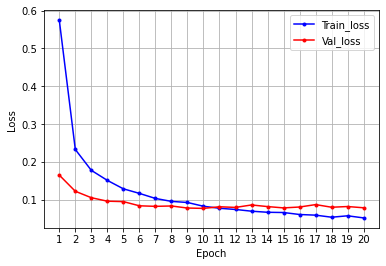

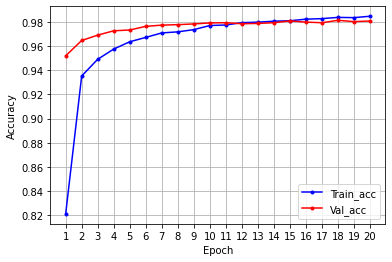

In [23]:
plot_loss(hist)
plot_accuracy(hist)